In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#reading the file data
df = pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape" )

In [5]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
#checking values in given table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#dropoing null columns 
df.drop(['Status','unnamed1'],axis = 1, inplace = True)

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [10]:
#checking remaining null values in remaining columns
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
#deleting null values 
df.dropna(inplace = True)

In [13]:
df.shape

(11239, 13)

In [16]:
#changing data type of particular column
df['Amount'] = df['Amount'].astype('int32')

In [17]:
df['Amount'].dtypes

dtype('int32')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

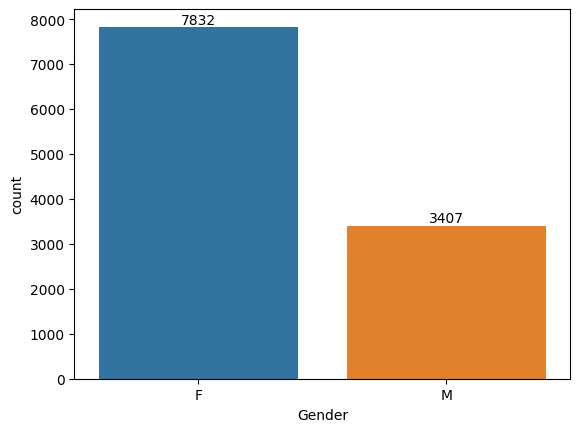

In [23]:
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

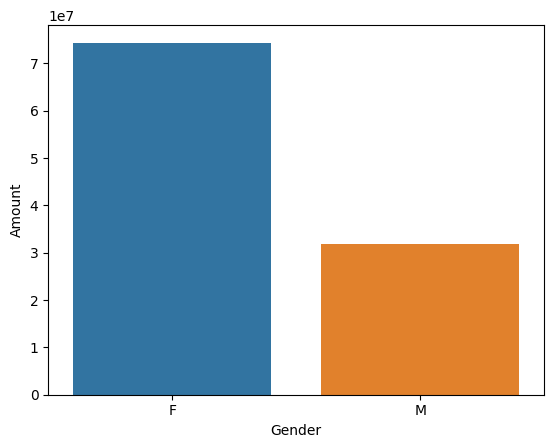

In [30]:
sales_gen = df.groupby(df['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x= 'Gender', y = 'Amount',data= sales_gen)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

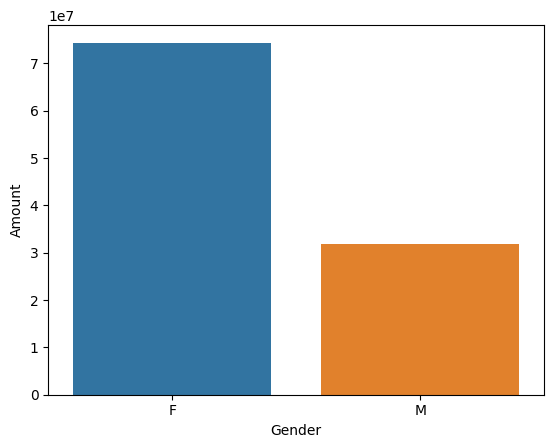

In [33]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Gender', y = 'Amount', data = sales_gen)

In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

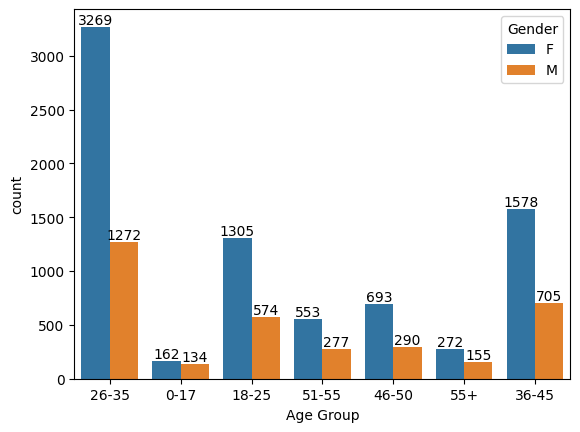

In [37]:

ax = sns.countplot(data = df , x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

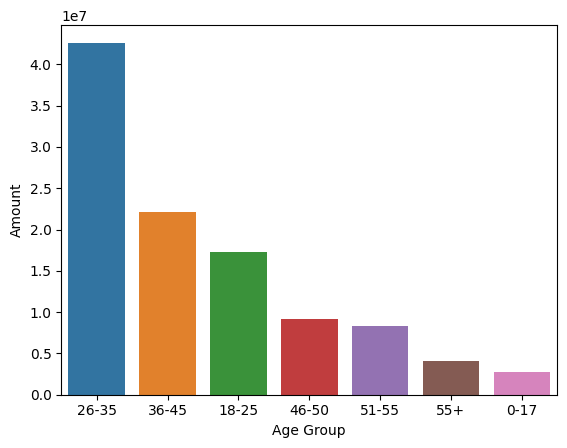

In [44]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by ='Amount',ascending = False)
sns.barplot(x='Age Group',y = 'Amount',data = sales_age)

In [72]:
#from the above graph it is clear that the agegroup of  26-35 the people are spending more and they are specially women

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

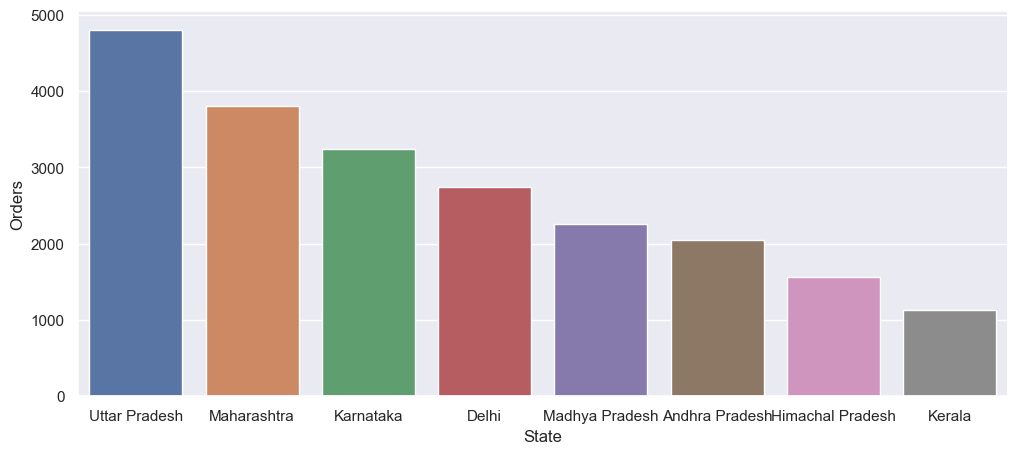

In [48]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by="Orders", ascending = False).head(8)
sns.set(rc= {'figure.figsize': (12,5)})
sns.barplot(data = sales_state , x ='State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

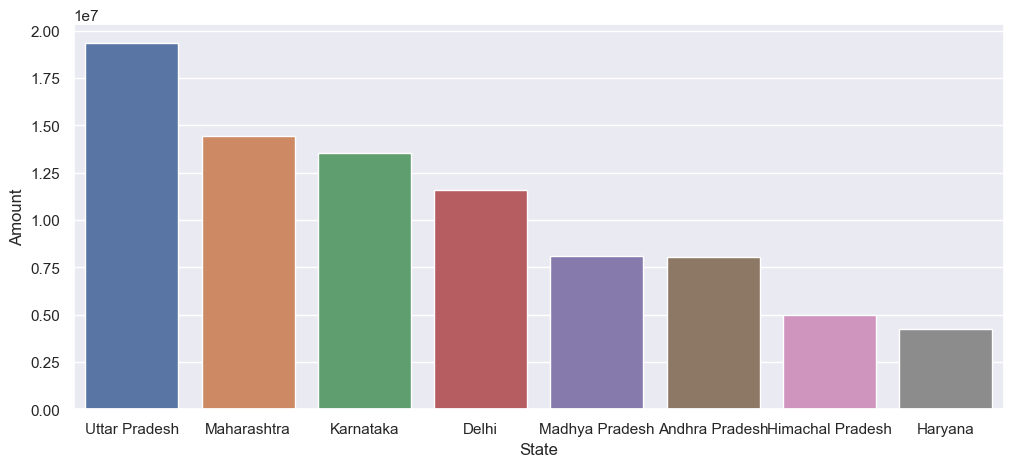

In [50]:
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(8)
sns.set(rc= {'figure.figsize': (12,5)})
sns.barplot(data = sales_state , x ='State', y='Amount')

In [73]:
the uttarpradesh have most sales and maharastra has at the second place

SyntaxError: invalid syntax (3522515850.py, line 1)

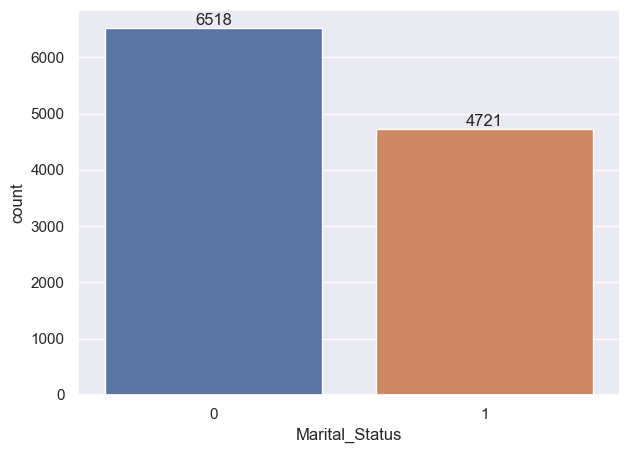

In [55]:
ax = sns.countplot(data = df , x = "Marital_Status")
sns.set(rc= {'figure.figsize': (5,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

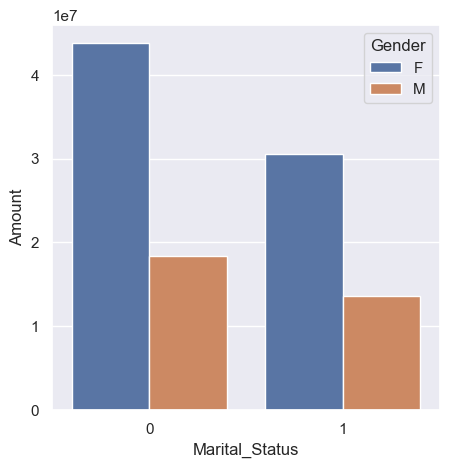

In [60]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc= {'figure.figsize': (5,5)})
sns.barplot(data = sales_state , x = 'Marital_Status',y ='Amount',hue ='Gender')



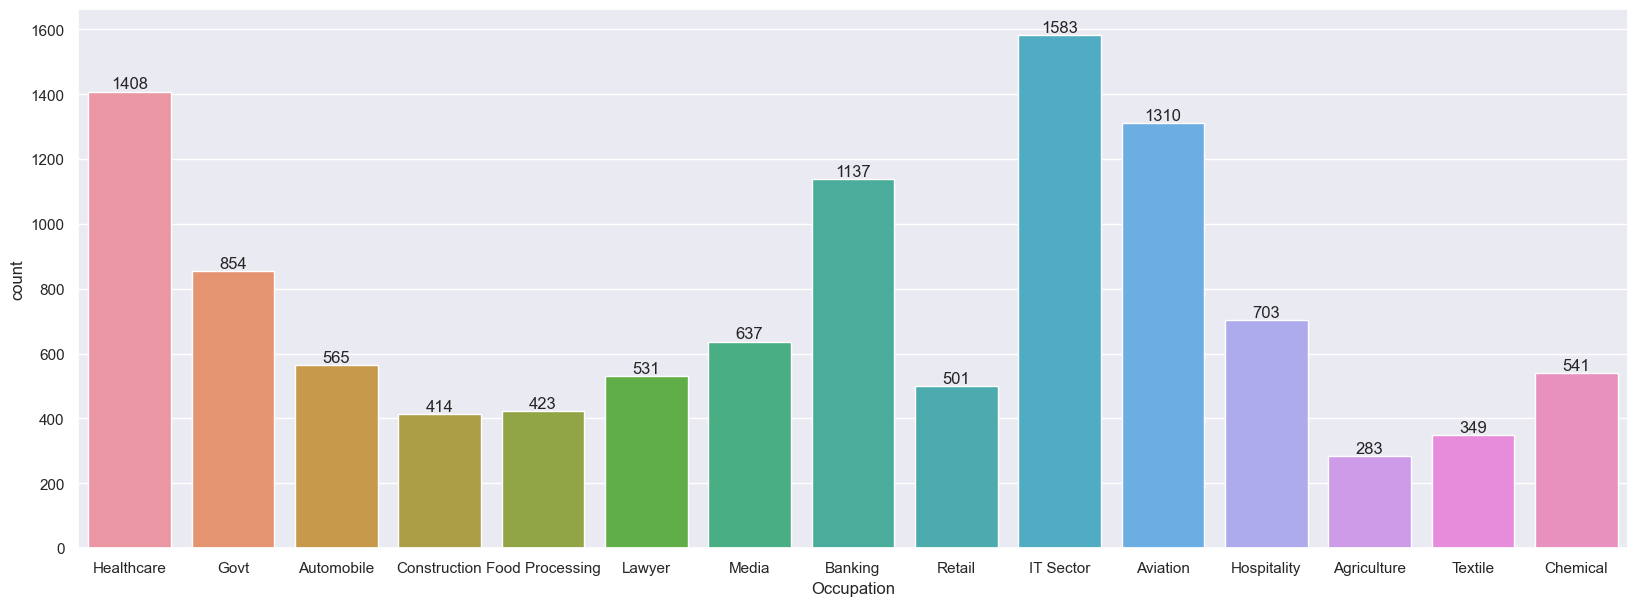

In [63]:
sns.set(rc = {'figure.figsize':(20,7)})
ax = sns.countplot(data = df , x = "Occupation")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

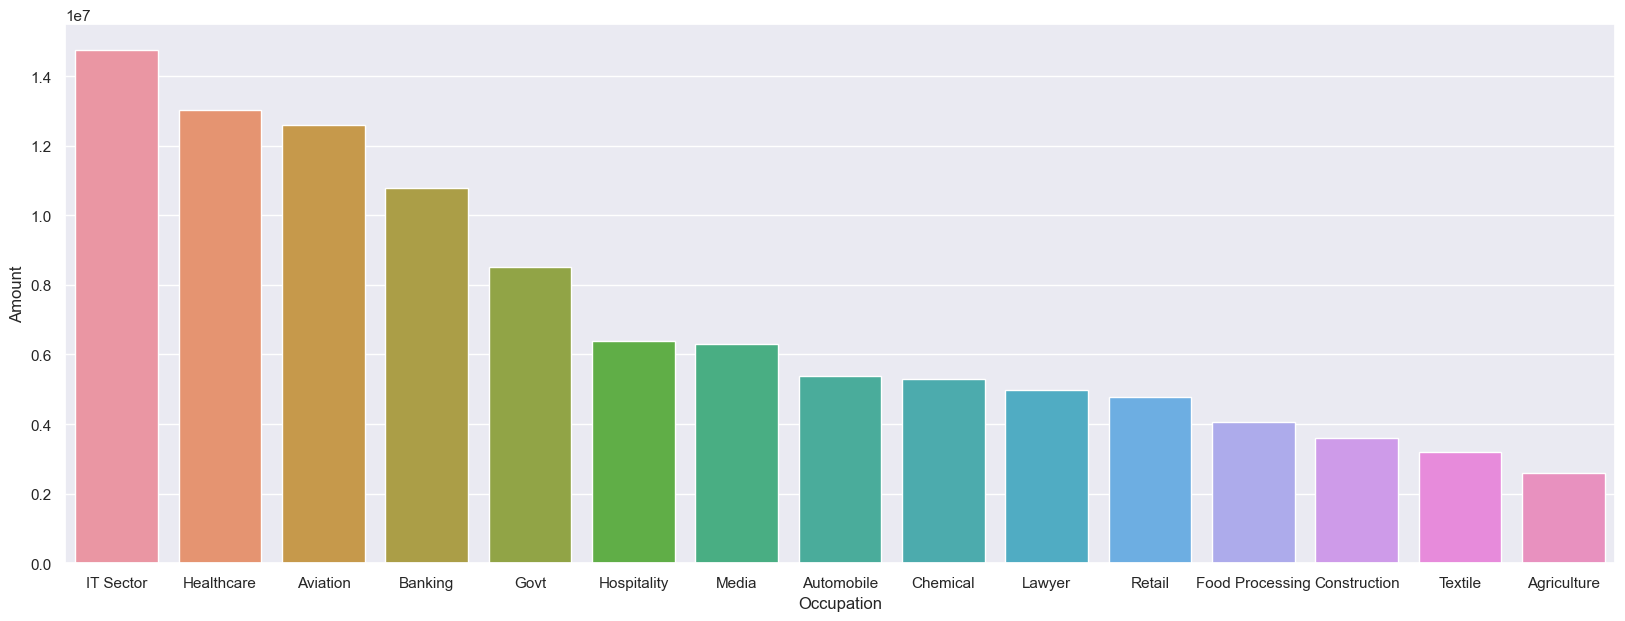

In [64]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values (by='Amount',ascending =False)
sns.set(rc = {'figure.figsize':(20,7)})
sns.barplot(data = sales_state , x = 'Occupation', y='Amount')

In [ ]:
# *from the above graph it is conclude that the it sector have the top sale and health care at second*

In [66]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

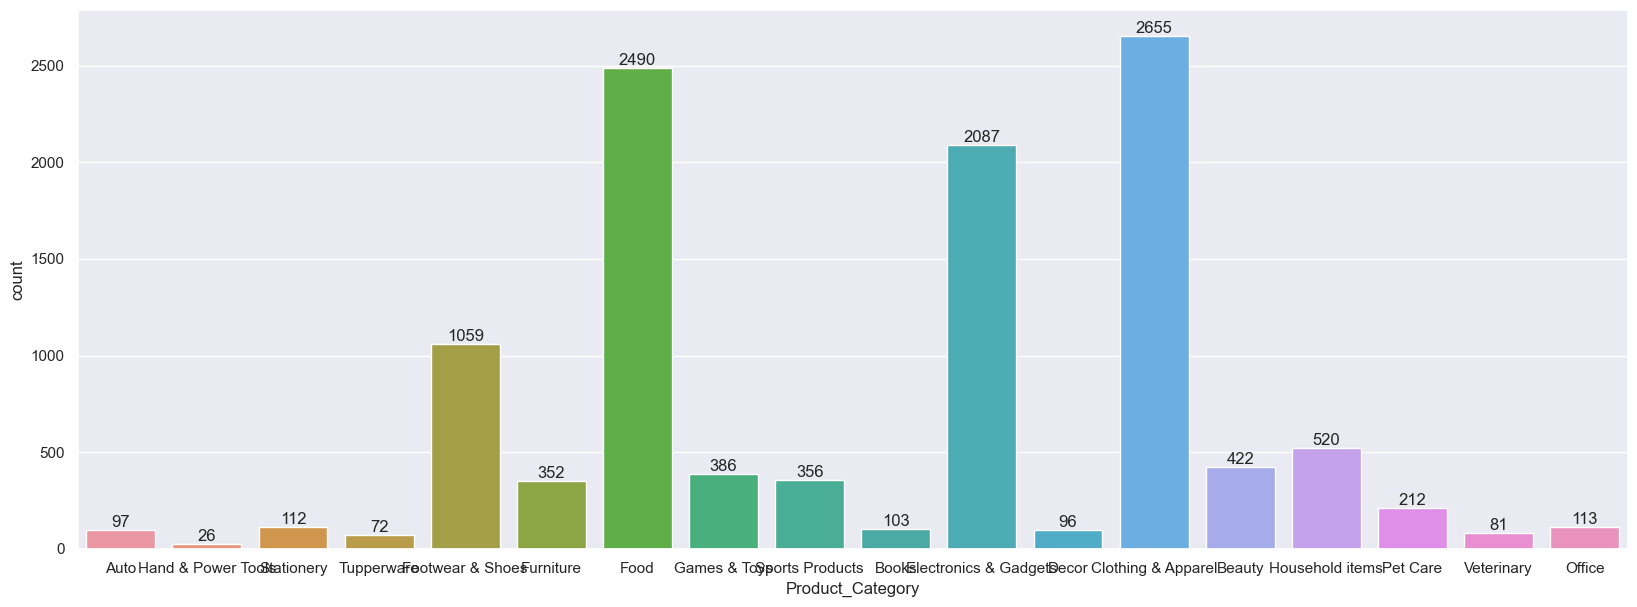

In [67]:
sns.set(rc = {'figure.figsize':(20,7)})
ax = sns.countplot(data= df , x = 'Product_Category')

for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

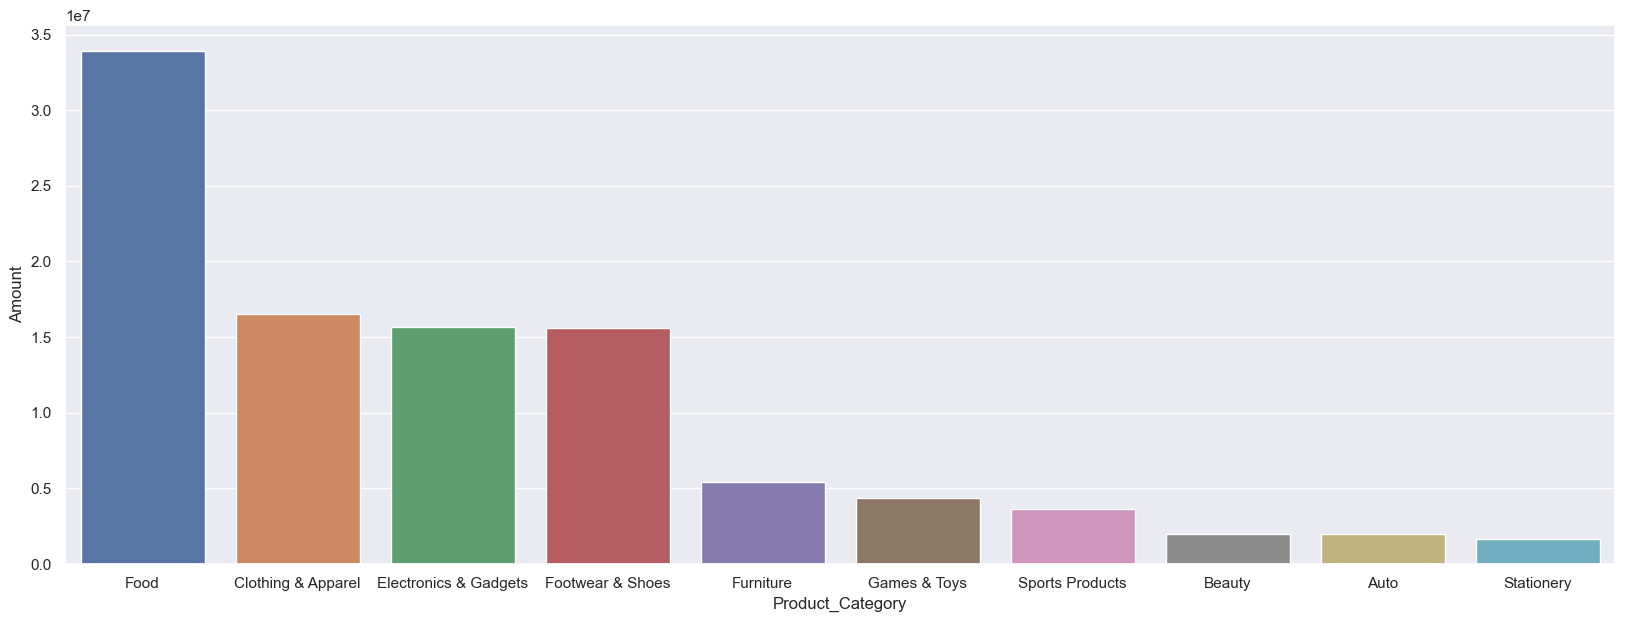

In [70]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values (by='Amount',ascending =False).head(10)
sns.set(rc = {'figure.figsize':(20,7)})
sns.barplot(data = sales_state , x = 'Product_Category', y='Amount')

<Axes: xlabel='Product_ID', ylabel='Amount'>

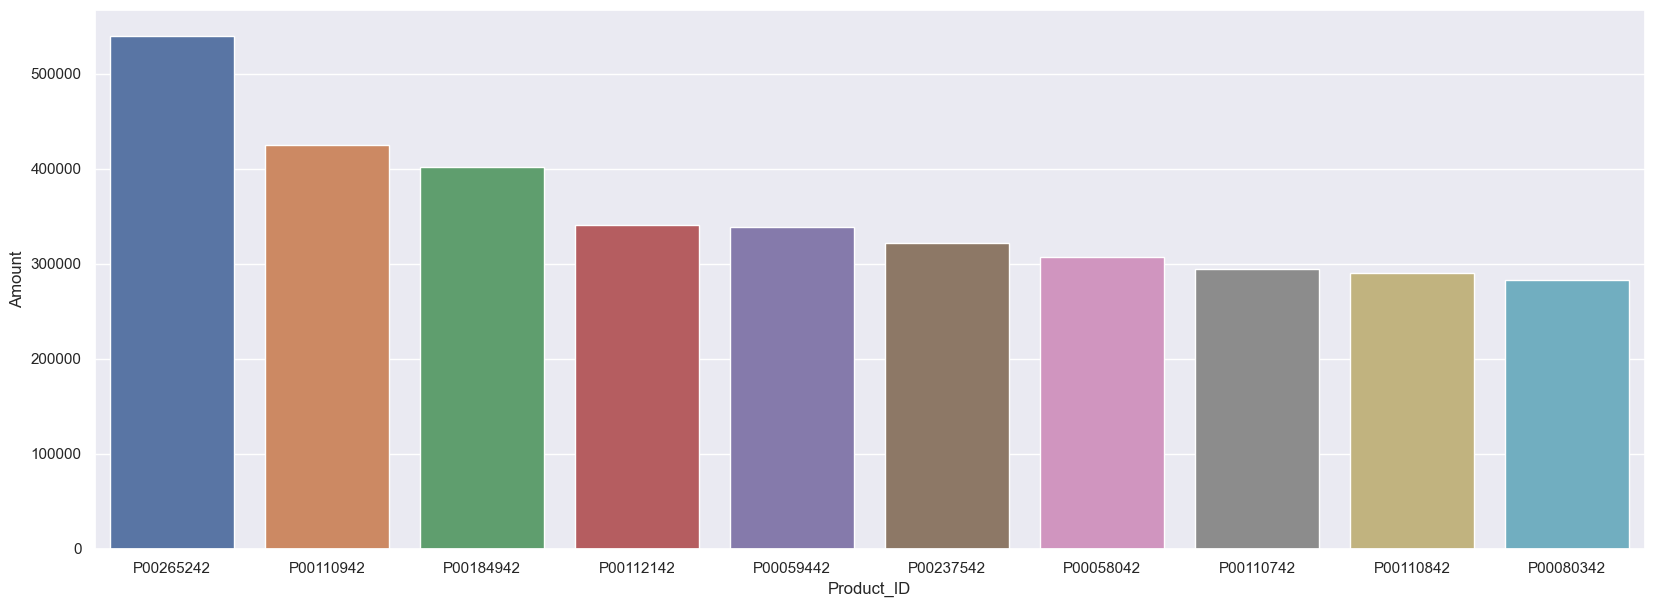

In [71]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values (by='Amount',ascending =False).head(10)
sns.set(rc = {'figure.figsize':(20,7)})
sns.barplot(data = sales_state , x = 'Product_ID', y='Amount')

# Conclusion